Nama  : Reza Hilmi Dafa

NIM   : 24060121130044

Nama Dataset : auction verification

Link Dataset : https://archive.ics.uci.edu/dataset/713/auction+verification

Kode di bawah ini mengimport beberapa library yang diperlukan seperti pandas, numpy, dan matplotlib untuk analisis data dan visualisasi.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

kode di bawah mengaitkan Google Drive agar dapat mengakses file yang ada di sana.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Menentukan nama kolom untuk dataset.
- Membaca dataset dari file CSV ke dalam DataFrame menggunakan pandas.
- Memeriksa bentuk dan 10 baris pertama dari dataset.

In [ ]:
names = ["process.b1.capacity", "process.b2.capacity", "process.b3.capacity", "process.b4.capacity",
         "property.price", "property.product", "property.winner", "verification.result"]
dataset = pd.read_csv ('/content/drive/MyDrive/ML/auction+verification.csv', names=names, header=0)

kode di bawah ini menampilkan 10 baris dataset

In [ ]:
print(dataset.shape)
print(dataset[:10])

(2043, 8)
   process.b1.capacity  process.b2.capacity  process.b3.capacity  \
0                    0                    2                    1   
0                    0                    2                    1   
0                    0                    2                    1   
0                    0                    2                    1   
0                    0                    2                    1   
0                    0                    2                    1   
0                    0                    2                    1   
0                    0                    2                    1   
0                    0                    2                    1   
0                    0                    2                    1   

   process.b4.capacity  property.price  property.product  property.winner  \
0                   59               1                 0            False   
0                   59               2                 0            False   
0         

mencetak nilai unik dari kolom 'verification.result' pada dataset

In [ ]:
print(np.unique(dataset['verification.result']))

[   77.91666667    78.            78.15       ... 42828.41666667
 43504.25       44130.52083333]


- Memilih fitur yang akan digunakan (kolom tertentu) dan memisahkan antara fitur (x) dan target (y).
- Melakukan standardisasi data menggunakan StandardScaler dari scikit-learn untuk memastikan skala yang seragam.

In [ ]:
features = ["process.b1.capacity", "process.b2.capacity", "process.b3.capacity", "process.b4.capacity",
         "property.price", "property.product", "property.winner"]

x = dataset.loc[:, features].values
y = dataset.loc[:, "verification.result"].values

x = StandardScaler().fit_transform(x)

menampilkan hasilnya

In [ ]:
print(x.shape)
print(y.shape)
print(x[:10])
print(y[:10])

(2043, 7)
(2043,)
[[-2.58174937  0.36225576  0.83730665 -1.5501031  -1.24853113 -0.42840815
  -0.38354708]
 [-2.58174937  0.36225576  0.83730665 -1.5501031  -0.69414097 -0.42840815
  -0.38354708]
 [-2.58174937  0.36225576  0.83730665 -1.5501031   0.41463933 -0.42840815
  -0.38354708]
 [-2.58174937  0.36225576  0.83730665 -1.5501031   1.52341964 -0.42840815
  -0.38354708]
 [-2.58174937  0.36225576  0.83730665 -1.42582964 -1.24853113 -0.42840815
   2.60724182]
 [-2.58174937  0.36225576  0.83730665 -1.42582964 -1.24853113  2.39493977
   2.60724182]
 [-2.58174937  0.36225576  0.83730665 -1.42582964 -1.24853113  3.33605575
  -0.38354708]
 [-2.58174937  0.36225576  0.83730665 -1.42582964 -0.69414097 -0.42840815
   2.60724182]
 [-2.58174937  0.36225576  0.83730665 -1.42582964 -0.69414097  2.39493977
   2.60724182]
 [-2.58174937  0.36225576  0.83730665 -1.42582964 -0.69414097  3.33605575
  -0.38354708]]
[163.31666667 200.86       154.88888889 108.64        85.46666667
  82.         154.25     

- Menggunakan analisis PCA dengan dua komponen utama.
- Mengubah data menggunakan PCA.
- Membuat DataFrame baru (principalDf) dari komponen utama.

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
              , columns = ['principal component 1', 'principal component 2'])

**principalDf_reset = principalDf.reset_index(drop=True):**

reset_index() adalah metode pandas yang digunakan untuk mereset indeks DataFrame.

drop=True digunakan untuk menghapus indeks sebelumnya dan menggantinya dengan indeks baru yang dihasilkan oleh reset.

Hasilnya disimpan dalam variabel baru yang disebut principalDf_reset.

**dataset_reset = dataset.reset_index(drop=True):**

Sama seperti sebelumnya, reset_index(drop=True) digunakan pada DataFrame dataset untuk mereset indeks.

Indeks yang ada sebelumnya dihapus dan digantikan dengan indeks baru.
Hasilnya disimpan dalam variabel baru yang disebut dataset_reset

In [ ]:
import pandas as pd

# Anggap principalDf dan dataset adalah DataFrame Anda
# Reset indeks untuk kedua DataFrame
principalDf_reset = principalDf.reset_index(drop=True)
dataset_reset = dataset.reset_index(drop=True)


Menggabungkan DataFrame yang berisi komponen utama dengan DataFrame asli untuk mendapatkan DataFrame akhir yang akan digunakan untuk plotting.

In [ ]:
finalDf = pd.concat([principalDf_reset, dataset_reset[["verification.result"]]], axis=1)

In [ ]:
print(principalDf.shape)
print(principalDf[:10])

(2043, 2)
   principal component 1  principal component 2
0              -0.841153               1.156253
1              -0.729527               1.406064
2              -0.506274               1.905685
3              -0.283022               2.405306
4               0.742955               0.801888
5               2.351073               0.910475
6               1.365824               1.240443
7               0.854581               1.051698
8               2.462699               1.160285
9               1.477450               1.490253


In [ ]:
print(finalDf.shape)
print(finalDf[:10])

(2043, 3)
   principal component 1  principal component 2  verification.result
0              -0.841153               1.156253           163.316667
1              -0.729527               1.406064           200.860000
2              -0.506274               1.905685           154.888889
3              -0.283022               2.405306           108.640000
4               0.742955               0.801888            85.466667
5               2.351073               0.910475            82.000000
6               1.365824               1.240443           154.250000
7               0.854581               1.051698            80.950000
8               2.462699               1.160285            78.000000
9               1.477450               1.490253           197.010000


Membuat plot 2D dari dua komponen utama yang dihasilkan oleh PCA.

Menunjukkan poin-poin data berdasarkan nilai target.

Setiap target diberi warna yang berbeda.

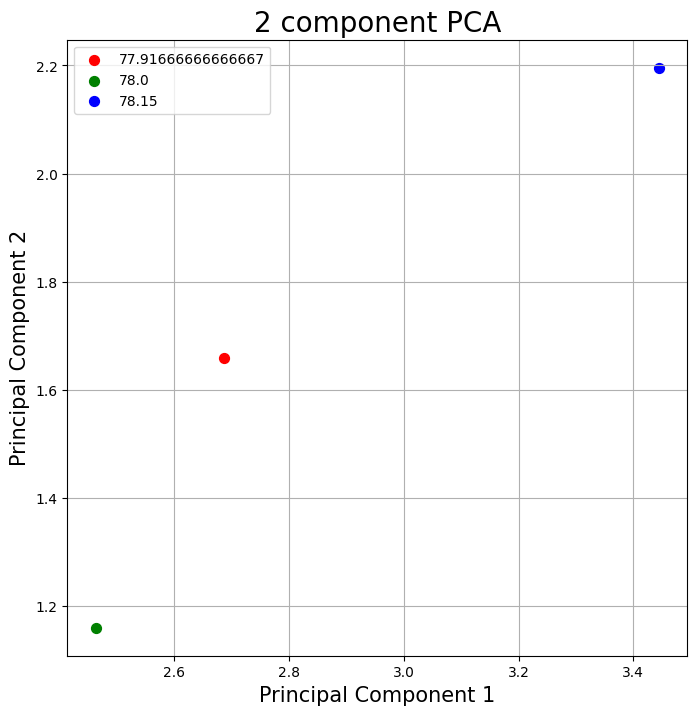

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = np.unique(dataset['verification.result'])
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['verification.result'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color,
               s=50)

ax.legend(targets)
ax.grid()

Menampilkan rasio variansi yang dijelaskan oleh masing-masing komponen utama.

In [ ]:
pca.explained_variance_ratio_

array([0.21280986, 0.17321727])

Kesimpulan :

 Dataset yang akan digunakan adalah dataset Auction Verification. Dataset ini dibuat sebagai bagian dari studi ilmiah untuk menentukan apakah verifikasi model proses yang kompleks (dalam hal ini: lelang multi-putaran simultan, seperti yang digunakan untuk pelelangan spektrum frekuensi) yang mahal dapat digantikan dengan prediksi hasil. Setiap instance dalam dataset ini merepresentasikan satu run verifikasi. Verifikasi memeriksa apakah harga tertentu mungkin untuk produk tertentu, dan (hanya untuk beberapa instance) apakah penawar tertentu dapat memenangkan produk dengan harga tersebut. Dataset mencakup tujuh kolom dan kolom ketujuh berisi informasi tentang verification.time.

 Berdasarkan praktikum yang telah dilakukan, PCA (Principal Component Analysis) adalah sebuah teknik transformasi ruang vektor yang diterapkan untuk mereduksi dimensi dari dataset yang berskala besar. Melalui pemetaan, data asli dengan beragam variabel dapat diinterpretasikan dengan lebih sederhana, mengurangi kompleksitasnya menjadi beberapa variabel yang mewakili informasi utama. Keuntungan penggunaan PCA dalam konteks machine learning mencakup penanganan masalah multicollinearity, pengurangan risiko overfitting, dan percepatan pelatihan model dengan dataset yang lebih kecil. Dataset yang digunakan adalah Auction Verification. Dataset ini dibuat sebagai bagian dari studi ilmiah untuk menentukan apakah verifikasi model proses yang kompleks. Targets yang digunakan adalah ‘verification.result’. Didapatkan hasil ‘array([0.21280986, 0.17321727])’ artinya Principal Component 1 menjelaskan sekitar 21.28% dari total varians dalam data, sementara Principal Component 2 menjelaskan sekitar 17.32%. Sehingga, jika menggunakan dua komponen utama total varians yang dijelaskan oleh keduanya adalah sekitar 38.60% (21.28% + 17.32%). Berarti sekitar 61.40% dari varians data tidak dijelaskan oleh dua komponen utama ini.